In [1]:
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''

    # TODO: Process a PIL image for use in a PyTorch model
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    mean_channel = 0
    size = 256, 256

    with Image.open(image) as im:
    

        print('flowers/train/1/image_06734.jpg',im)

        im.thumbnail(size)
    
        width, height = im.size

        left = (width - 224) / 2
        top = (height - 224) / 2
        right = (width + 224) / 2
        bottom = (height + 224) / 2

        cropped_im = im.crop((left, top, right, bottom))
        cropped_im.show()
        np_image = np.array(cropped_im)
        print(np_image.shape)
        #we are looping through this image 3 times because there is 3 color chanel
        #for i in range(3):
        #   np_image[:, :, i] = (np_image[:, :, i] - mean[i]) / std[i]
        np_image = np_image - mean / std

        #we are converting this back to torch tensor because the model is expecting a torch tensor
        np_image = torch.from_numpy(np_image.transpose(2, 0, 1))
        print(np_image.shape)


    return np_image


In [ ]:

def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    print("Image type:",type(image))
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))

    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax


flowers/train/1/image_06734.jpg <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=523x500 at 0x73B5F8485A60>
(224, 224, 3)
torch.Size([3, 224, 224])
Image type: <class 'torch.Tensor'>


<Axes: >

/usr/bin/eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


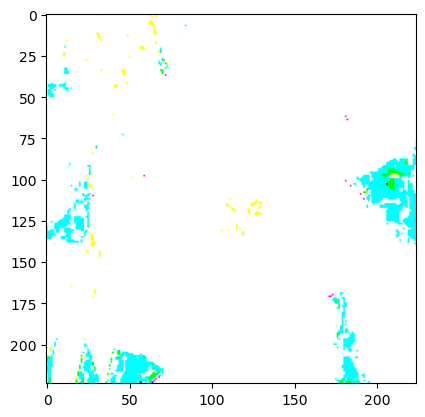

In [50]:

image = process_image('flowers/train/1/image_06734.jpg')
imshow(image)
